In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('feature_data.csv')

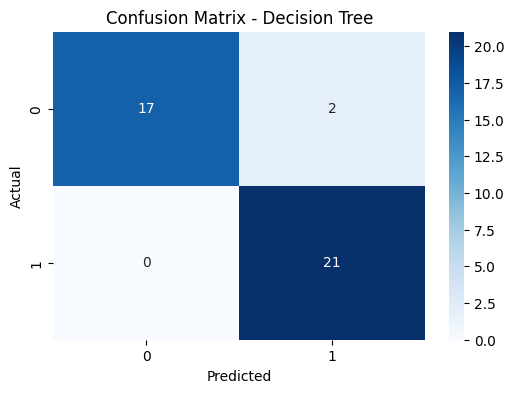

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      1.00      0.95        21

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
X = df.drop(columns=["index", "filename", "label", "width", "height"])
y = df["label"]

# Randomize data and split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Normalize features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=7, max_depth=5)
clf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = clf.predict(X_test_scaled)

# Evaluate Model - Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Print Classification Report
print(classification_report(y_test, y_pred))


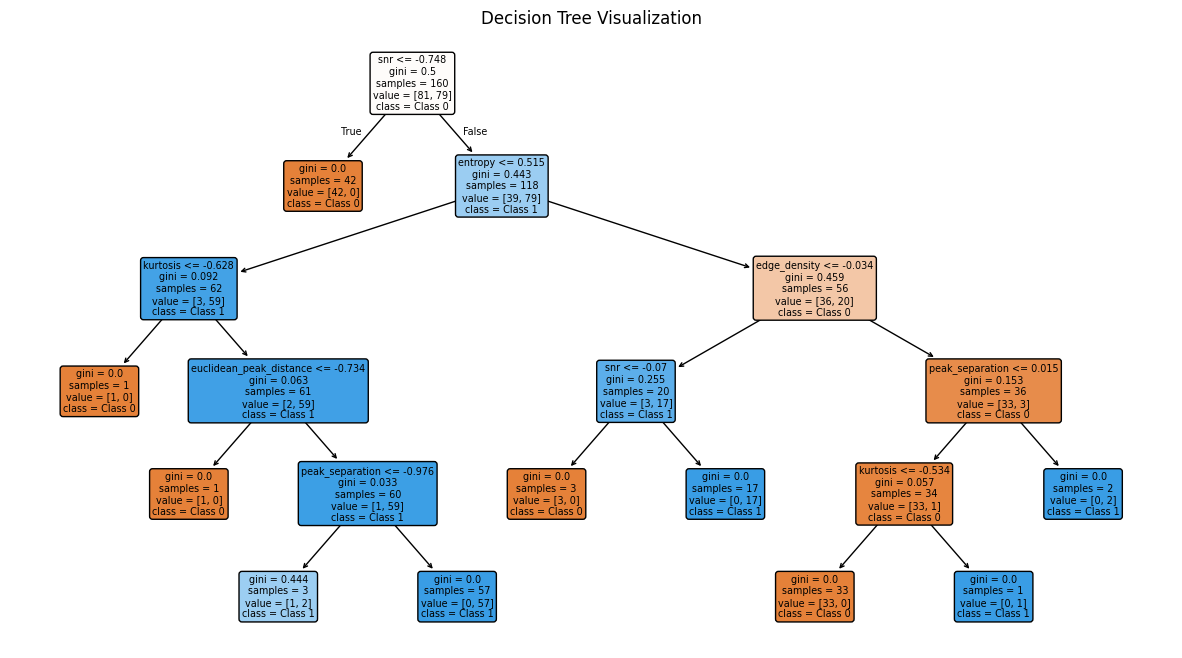

In [25]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Class 0", "Class 1"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


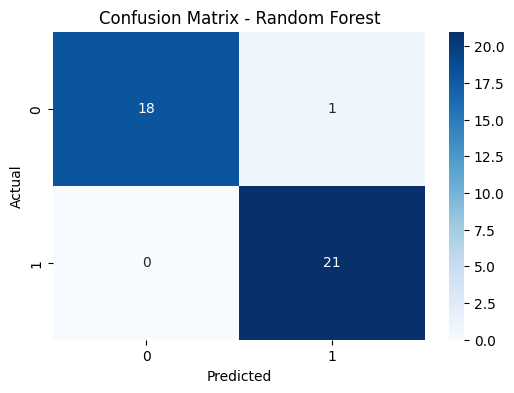

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [18]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf_clf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = rf_clf.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Print Classification Report
print(classification_report(y_test, y_pred))


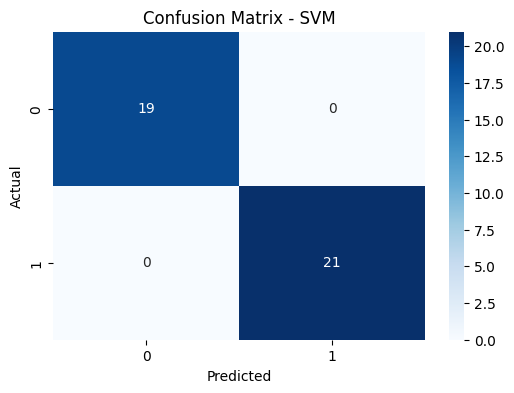

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [19]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Step 5: Make Predictions
y_pred = svm_clf.predict(X_test_scaled)

# Step 6: Evaluate Model - Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# Step 7: Print Classification Report
print(classification_report(y_test, y_pred))

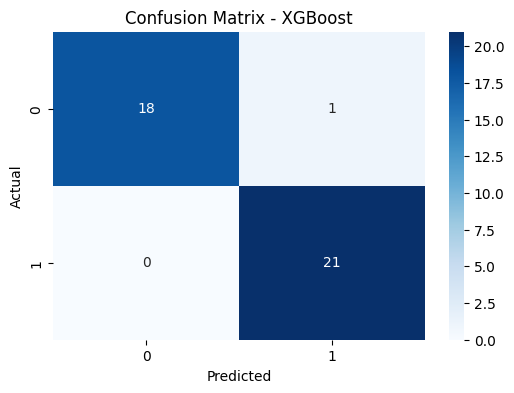

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [20]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=10, random_state=42)
xgb_clf.fit(X_train_scaled, y_train)

# Step 5: Make Predictions
y_pred = xgb_clf.predict(X_test_scaled)

# Step 6: Evaluate Model - Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Step 7: Print Classification Report
print(classification_report(y_test, y_pred))

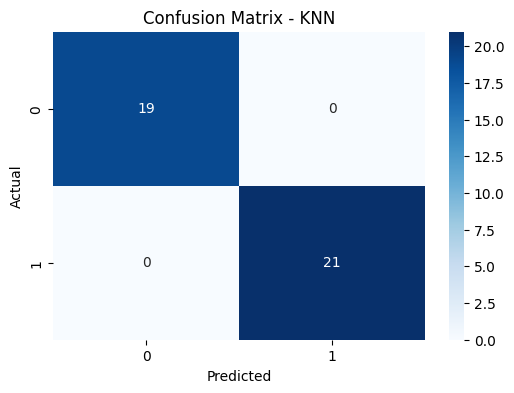

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(columns=["index", "filename", "label", "height", "width", "area"])
y = df["label"]

# Step 2: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split (Shuffle Data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

# Step 4: Train KNN Classifier (Choosing k=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

# Step 7: Print Classification Report
print(classification_report(y_test, y_pred))